<a href="https://colab.research.google.com/github/Isafon/ECE528/blob/main/ECE528_ASN2_Q3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q3 Part A ECE528 LA2 - Isa Fontana

In [1]:
import os
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image

# **Uploading file from your direcorty**
 The file you upload should be a zip folder containing your dataset.
This code below will prompt you to select and upload the zip file from your local computer into colab directory

In [2]:
# If you are using google colab, run this cell
from google.colab import files
uploaded = files.upload()

Saving WeatherDataset-Q3.zip to WeatherDataset-Q3.zip


# **Unziping the Folder in Colab**
Here you should be able to see the extracted zip folder in your colab folder directory

In [3]:
import zipfile

for filename in uploaded.keys():
    if filename.endswith('.zip'):
        zip_ref = zipfile.ZipFile(filename, 'r')
        zip_ref.extractall()
        print(f"Extracted folder correctly {filename}")
        zip_ref.close()

Extracted folder correctly WeatherDataset-Q3.zip


In [4]:
# # Define paths for the weather condition folders
weather_conditions = ['rain', 'hail', 'glaze', 'frost', 'fogsmog', 'dew',
                      'lightning', 'rainbow', 'rime', 'sandstorm', 'snow']
print(weather_conditions)

['rain', 'hail', 'glaze', 'frost', 'fogsmog', 'dew', 'lightning', 'rainbow', 'rime', 'sandstorm', 'snow']


In [5]:
# Get parent directory
parent_dir = os.getcwd()
print(parent_dir)

# List the extracted contents in your Colab ennvironment to see where the extracted folder is found at and point it to the correct path below
extracted_files = os.listdir(parent_dir)

# find the 'WeatherDataset' folder extracted in your colab directory
weather_dataset_folder = 'WeatherDataset'
if weather_dataset_folder not in extracted_files:
    raise FileNotFoundError(f"'{weather_dataset_folder}' folder not found in {parent_dir}")

weather_dataset_path = os.path.join(parent_dir, weather_dataset_folder)
print(f"WeatherDataset folder path: {weather_dataset_path}")

# # # # Define train and test folders
train_folders = [os.path.join(weather_dataset_path, condition, 'train') for condition in weather_conditions]
test_folders = [os.path.join(weather_dataset_path, condition, 'test') for condition in weather_conditions]
print(train_folders)
print(test_folders)

/content
WeatherDataset folder path: /content/WeatherDataset
['/content/WeatherDataset/rain/train', '/content/WeatherDataset/hail/train', '/content/WeatherDataset/glaze/train', '/content/WeatherDataset/frost/train', '/content/WeatherDataset/fogsmog/train', '/content/WeatherDataset/dew/train', '/content/WeatherDataset/lightning/train', '/content/WeatherDataset/rainbow/train', '/content/WeatherDataset/rime/train', '/content/WeatherDataset/sandstorm/train', '/content/WeatherDataset/snow/train']
['/content/WeatherDataset/rain/test', '/content/WeatherDataset/hail/test', '/content/WeatherDataset/glaze/test', '/content/WeatherDataset/frost/test', '/content/WeatherDataset/fogsmog/test', '/content/WeatherDataset/dew/test', '/content/WeatherDataset/lightning/test', '/content/WeatherDataset/rainbow/test', '/content/WeatherDataset/rime/test', '/content/WeatherDataset/sandstorm/test', '/content/WeatherDataset/snow/test']


Setting image size and batch size

In [6]:
IMG_SIZE = 299  # Xception expects 299x299 images
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

Helper function to load and preprocess images

In [7]:
# Function to load images from a folder and assign a label
def load_images_from_folder(folder, label_value):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = image.img_to_array(img) / 255.0  # Rescale images to [0, 1]
        images.append(img_array)
        labels.append(label_value)
    return np.array(images), np.array(labels)

Load train and test datasets for all weather conditions

In [8]:
train_images = []
train_labels = []
test_images = []
test_labels = []

for i, folder in enumerate(train_folders):
    images, labels = load_images_from_folder(folder, i)  # Assign unique label i for each weather condition
    train_images.append(images)
    train_labels.append(labels)

for i, folder in enumerate(test_folders):
    images, labels = load_images_from_folder(folder, i)  # Same label for the test set
    test_images.append(images)
    test_labels.append(labels)

Combine the loaded images and labels for training and testing

In [9]:
train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)

test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

Define class names

In [10]:
class_names = weather_conditions
num_classes = len(class_names)

print(f"Loaded {len(train_images)} training images and {len(test_images)} test images.")

Loaded 3368 training images and 841 test images.


### Format the Data
Use the tf.image module to format the images for the task.
Resize the images to a fixed input size, and rescale the input channels to a range of [-1,1]

In [11]:
def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

### Create TensorFlow datasets and apply the format function


In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.map(format_example).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.map(format_example).batch(BATCH_SIZE)

### Inspect a batch of data

In [13]:
for image_batch, label_batch in train_dataset.take(1):
    print(f"Image batch shape: {image_batch.shape}")
    print(f"Label batch shape: {label_batch.shape}")

Image batch shape: (32, 299, 299, 3)
Label batch shape: (32,)


### Show the first Nine images and labels from the training set

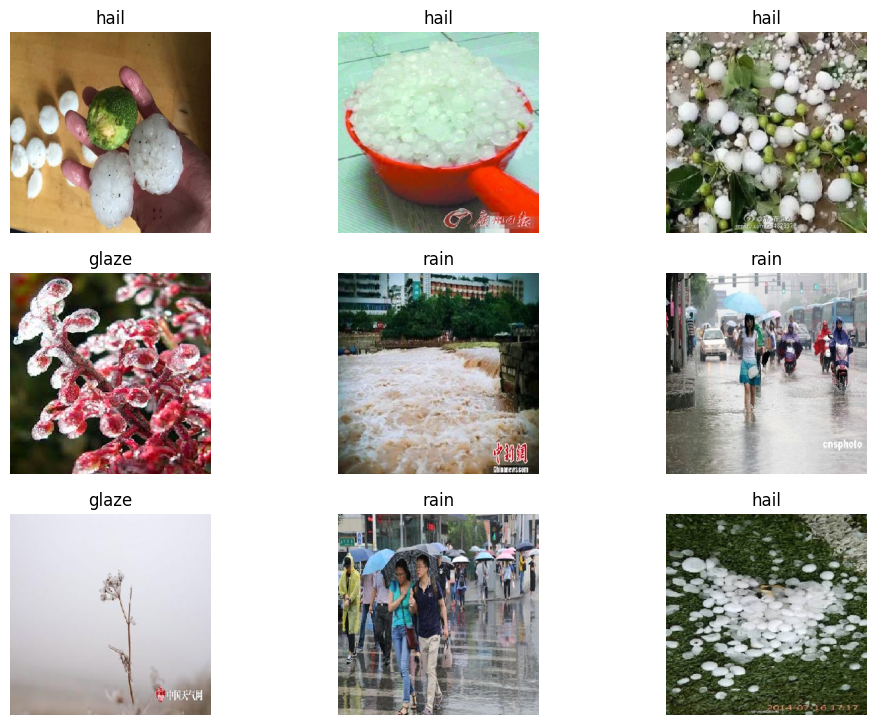

In [14]:
# Show the first Nine images in a 3x2 grid
plt.figure(figsize=(12, 12))
for i, (image, label) in enumerate(train_dataset.unbatch().take(9)):
    plt.subplot(4, 3, i + 1)

    plt.imshow(image.numpy())
    plt.title(class_names[label.numpy()])
    plt.axis("off")
plt.show()

In [27]:
# IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# # Create the base model from the pre-trained Xception

# base_model = keras.applications.Xception(input_shape=IMG_SHAPE,
#                                                   include_top=False,
#                                                   weights='imagenet',
#                                                  )
# Keep your existing IMG_SIZE and IMG_SHAPE from earlier cells
# ==== Q3(b) EfficientNetB0 with correct preprocessing ====
from tensorflow import keras

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Augment a bit (helps generalization)
data_augment = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.05),
    keras.layers.RandomZoom(0.10),
], name="augment")

# EfficientNetB0 expects 0..255 floats then its own normalize.
# If your pipeline scales to [0,1], multiply by 255 first, then preprocess_input.
pre_fn = keras.applications.efficientnet.preprocess_input

inputs = keras.Input(shape=IMG_SHAPE, name="images")
x = data_augment(inputs)
x = keras.layers.Rescaling(255.0)(x)          # <-- undo [0,1] to 0..255
x = keras.layers.Lambda(pre_fn, name="effnet_preproc")(x)

base_model = keras.applications.EfficientNetB0(
    include_top=False, weights="imagenet", input_tensor=x
)
base_model.trainable = False  # frozen for warmup

x = keras.layers.GlobalAveragePooling2D(name="gap")(base_model.output)
x = keras.layers.Dropout(0.25, name="dropout")(x)
outputs = keras.layers.Dense(num_classes, activation="softmax", name="classifier")(x)

model = keras.Model(inputs, outputs, name="weather_effnetb0")
model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()


Model: "weather_effnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ images (InputLayer) │ (None, 299, 299,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ augment             │ (None, 299, 299,  │          0 │ images[0][0]      │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 299, 299,  │          0 │ augment[0][0]     │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ effnet_preproc      │ (None, 299, 299,  │          0 │ rescaling_2[0][0] │
│ (Lambda)            │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 299, 299,  │          0 │ effnet_preproc[0… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 299, 299,  │          7 │ rescaling_3[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 299, 299,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 301, 301,  │          0 │ rescaling_4[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 150, 150,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 150, 150,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 150, 150,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 150, 150,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 150, 150,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 150, 150,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha

 Total params: 4,063,662 (15.50 MB)

 Trainable params: 14,091 (55.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

This feature extractor converts each `299x299x3` image into a `10x10x2048` block of features. See what it does to the example batch of images:

In [28]:
# Feature extractor output shape
feature_batch = base_model(image_batch)
print(f"Feature batch shape: {feature_batch.shape}")

Feature batch shape: (32, 10, 10, 1280)


In [29]:
# Freeze the convolutional base
base_model.trainable = False

In [30]:
# Take a look at the base model architecture (Xception)
base_model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ images (InputLayer) │ (None, 299, 299,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ augment             │ (None, 299, 299,  │          0 │ images[0][0]      │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 299, 299,  │          0 │ augment[0][0]     │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ effnet_preproc      │ (None, 299, 299,  │          0 │ rescaling_2[0][0] │
│ (Lambda)            │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 299, 299,  │          0 │ effnet_preproc[0… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 299, 299,  │          7 │ rescaling_3[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 299, 299,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 301, 301,  │          0 │ rescaling_4[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 150, 150,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 150, 150,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 150, 150,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 150, 150,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 150, 150,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 150, 150,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

### Add a classification head

To generate predictions from the block of features, average over the spatial `5x5` spatial locations, using a `tf.keras.layers.GlobalAveragePooling2D` layer to convert the features to  a single 2048-element vector per image.

In [31]:
# # Use GlobalAveragePooling2D to convert the features to a single vector per image
# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# feature_batch_average = global_average_layer(feature_batch)
# print(f"Feature batch after GlobalAveragePooling2D: {feature_batch_average.shape}")

global_average_layer = keras.layers.GlobalAveragePooling2D(name="gap")
drop_layer = keras.layers.Dropout(0.25, name="dropout")  # mild regularization
prediction_layer = keras.layers.Dense(num_classes, activation="softmax", name="classifier")

# Wire them together into a Sequential (base -> GAP -> Dropout -> Dense)
model = keras.Sequential(
    [
        base_model,
        global_average_layer,
        drop_layer,
        prediction_layer,
    ],
    name="weather_effnetb0"
)


Apply a `tf.keras.layers.Dense` layer to convert these features into a prediction per image.

In [20]:
# # Add a Dense layer to convert features into predictions
# prediction_layer = tf.keras.layers.Dense(num_classes, activation='softmax')
# prediction_batch = prediction_layer(feature_batch_average)
# print(f"Prediction batch shape: {prediction_batch.shape}")

Now stack the feature extractor, and these two layers using a `tf.keras.Sequential` model:

In [32]:
# Stack the feature extractor and the classifier layers using Sequential model
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

### Compile the model

You must compile the model before training it.  Since there are 102 classes, use a sparse categorical cross-entropy loss with `from_logits=True` since the model provides a linear output.

In [33]:
# # Use the Adam optimizer and sparse categorical cross-entropy for classification
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [34]:
# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 10, 10, 1280)   │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gap (GlobalAveragePooling2D)    │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 11)             │        14,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,063,662 (15.50 MB)

 Trainable params: 14,091 (55.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [35]:
# If the skeleton used different names, alias them so the rest of the code works
if 'train_ds' in globals() and 'train_dataset' not in globals():
    train_dataset = train_ds
if 'test_ds' in globals() and 'test_dataset' not in globals():
    test_dataset = test_ds
if 'val_ds' in globals() and 'val_dataset' not in globals():
    val_dataset = val_ds

# Create a validation dataset from the training dataset if none exists
if 'val_dataset' not in globals():
    ds = train_dataset

    # one-time deterministic shuffle before splitting to avoid bias
    ds = ds.shuffle(1000, seed=0, reshuffle_each_iteration=False)

    n = tf.data.experimental.cardinality(ds).numpy()
    val_size = max(1, int(0.1 * n))

    val_dataset   = ds.take(val_size)
    train_dataset = ds.skip(val_size)

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(AUTOTUNE)
val_dataset   = val_dataset.cache().prefetch(AUTOTUNE)
test_dataset  = test_dataset.cache().prefetch(AUTOTUNE)

In [36]:
# PERFORM TRANSFER LEARNING AND FINE TUNING HERE
base_model.trainable = False
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

ckpt1 = keras.callbacks.ModelCheckpoint(
    "q3b_stage1.weights.h5", monitor="val_accuracy",
    save_best_only=True, save_weights_only=True, mode="max", verbose=1
)
early1 = keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=3, restore_best_weights=True, mode="max", verbose=1
)

hist1 = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[ckpt1, early1],
    verbose=2,
)

# unfreeze last ~50 layers; you can try 70–80 if you want a bit more
N_UNFREEZE = 50
base_model.trainable = True
for layer in base_model.layers[:-N_UNFREEZE]:
    layer.trainable = False

model.compile(optimizer=keras.optimizers.Adam(1e-4),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

ckpt2 = keras.callbacks.ModelCheckpoint(
    "q3b_stage2.weights.h5", monitor="val_accuracy",
    save_best_only=True, save_weights_only=True, mode="max", verbose=1
)
early2 = keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=4, restore_best_weights=True, mode="max", verbose=1
)
reduce2 = keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy", factor=0.5, patience=2, min_lr=1e-6, mode="max", verbose=1
)

hist2 = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    callbacks=[ckpt2, early2, reduce2],
    verbose=2,
)

test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(f"Q3(b) – EfficientNetB0 Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.81563, saving model to q3b_stage1.weights.h5
96/96 - 25s - 258ms/step - accuracy: 0.6473 - loss: 1.2415 - val_accuracy: 0.8156 - val_loss: 0.7289
Epoch 2/10

Epoch 2: val_accuracy improved from 0.81563 to 0.85625, saving model to q3b_stage1.weights.h5
96/96 - 9s - 96ms/step - accuracy: 0.8356 - loss: 0.6013 - val_accuracy: 0.8562 - val_loss: 0.5334
Epoch 3/10

Epoch 3: val_accuracy improved from 0.85625 to 0.87187, saving model to q3b_stage1.weights.h5
96/96 - 9s - 96ms/step - accuracy: 0.8648 - loss: 0.4732 - val_accuracy: 0.8719 - val_loss: 0.4455
Epoch 4/10

Epoch 4: val_accuracy improved from 0.87187 to 0.88125, saving model to q3b_stage1.weights.h5
96/96 - 9s - 96ms/step - accuracy: 0.8809 - loss: 0.4069 - val_accuracy: 0.8813 - val_loss: 0.3901
Epoch 5/10

Epoch 5: val_accuracy improved from 0.88125 to 0.89688, saving model to q3b_stage1.weights.h5
96/96 - 9s - 96ms/step - accuracy: 0.8930 - loss: 0.3658 - val_accuracy: 0.

In [37]:
### Evaluate the model on the test dataset
### Without any transfer learning, Xception achieves
### approximately 8-12% accuracy on the test dataset
results = model.evaluate(test_dataset)
print('Test loss, Test accuracy:', results)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.8779 - loss: 0.3147
Test loss, Test accuracy: [0.2852672338485718, 0.900118887424469]
